# Step 1:  Import a test Image to see if it works

/Users/maycaj/Library/Python/3.9/lib/python/site-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [0, 112, 223]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.12040803581476212, 0.5221580266952515]
    G: [0.0, 0.7863040566444397]
    B: [0.0, 0.6940276026725769]

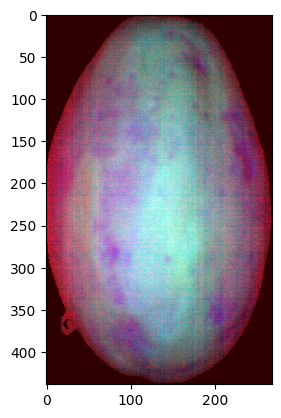

In [3]:
import spectral as sp
# hdr = sp.envi.open('/Users/maycaj/Downloads/Papaya/VIS/day_m4_01/papaya_day_m4_01_20_front.hdr', image='/Users/maycaj/Downloads/Papaya/VIS/day_m4_01/papaya_day_m4_01_20_front.bin')
# See the difference to the VIS_COR
hdr = sp.envi.open('/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/VIS/day_m4_01/papaya_day_m4_01_01_back.hdr', image='/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/VIS/day_m4_01/papaya_day_m4_01_01_back.bin')

# Read the data from the HDR file
data = hdr.load()

# Visualize the hyperspectral image
sp.imshow(data)

# Step 2: Display image in false RGB
Not sure which bands correspond to which wavelengths. Not sure which camera was used for each picture, but 2/3 of the cameras used have a wavelength from 400 to 1000nm and we know our camera has 224 bands. Setting up a proportion and solving for band number we can caluclate which bands correspond to which wavelengths.

$ band number/(totalbands) = ((redwavelength) - 400)/((highestwavelength)-400) $
- totalbands = 224
- redwavelength=700
- highestwavelength = 1000

- Specim FX10 = 400 to 1000nm region, 100 bands
- INNO-SPEC Redeye 1.7 = 950 to 1700nm
- Corning microHSI 410 Vis-NIR Hyperspectral Sensor = 400 to 1000nm

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.7863040566444397]
    G: [0.0, 0.25700750946998596]
    B: [0.0, 0.1600431352853775]

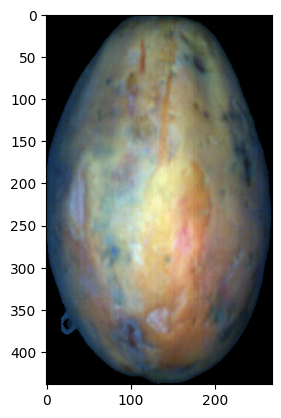

In [4]:
# Define the bands for false RGB
total_bands = 224 #from .hdr file
red_band = 112  
green_band = 46
blue_band = 28


# Create a false RGB image
false_rgb = data[:, :, [red_band, green_band, blue_band]]

# Visualize the false RGB image
sp.imshow(false_rgb)

# Step 3: Try Saving as a Cube File to see if I can load it into Matlab

First answer: Can the ML toolkit easily read .cube files?
I think Karthik was able to write a function to import them, but texted to double check

In [5]:
data.shape

(439, 268, 224)

In [6]:
import numpy as np
from scipy.io import savemat

save_path = '/Users/maycaj/Downloads/hyperspectral_image.mat'
data_to_save = {'hyperspectral_image': data}
savemat(save_path, data_to_save)

# Step 4: Create a function that Oranizes the data into folders based on ripeness label
Use /Users/maycaj/Documents/Hyperspectral-Imaging/PapayaData/annotationstrain_only_labeled_v2.json to categorize the fruits into folders based on ripeness_state which contains the following categories:
- unripe
- perfect
- overripe

1. Within the json file (train_only_labeled_v2.json) we navegate to
annotations --> a number --> ripeness state
2. Find the corresponding id 
annotations --> a number --> id
3. Use the id to find the filepath for the .bin
    Use the VIS not the VIS_COR (Seems like same images but lower resolution)
records --> files --> data_file
4. Add the 224 bands evenly spaced from 400nm to 1000nm
4. Convert the .bin file to a .mat variable
5. add the .mat variable to a folder corresponding to the ripeness
    - /Users/maycaj/Documents/Hyperspectral-Imaging/PapayaData/matlab/ripe
    - /Users/maycaj/Documents/Hyperspectral-Imaging/PapayaData/matlab/perfect
    - /Users/maycaj/Documents/Hyperspectral-Imaging/PapayaData/matlab/overripe

In [7]:
import json
json_path = '/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/annotations/train_only_labeled_v2.json'

with open(json_path, 'r') as file:
    data = json.load(file)
print(data)

# Access the value of annotations -> 0 -> ripeness_State
ripeness_state_value = data['annotations'][0]['ripeness_state']
print("Ripeness State:", ripeness_state_value)


{'info': {'createdAt': '2022-09-14T15:08:36.894162'}, 'cameras': [{'id': 'VIS', 'name': 'Specim FX10', 'wavelengths': [397.66, 400.28, 402.9, 405.52, 408.13, 410.75, 413.37, 416.0, 418.62, 421.24, 423.86, 426.49, 429.12, 431.74, 434.37, 437.0, 439.63, 442.26, 444.89, 447.52, 450.16, 452.79, 455.43, 458.06, 460.7, 463.34, 465.98, 468.62, 471.26, 473.9, 476.54, 479.18, 481.83, 484.47, 487.12, 489.77, 492.42, 495.07, 497.72, 500.37, 503.02, 505.67, 508.32, 510.98, 513.63, 516.29, 518.95, 521.61, 524.27, 526.93, 529.59, 532.25, 534.91, 537.57, 540.24, 542.91, 545.57, 548.24, 550.91, 553.58, 556.25, 558.92, 561.59, 564.26, 566.94, 569.61, 572.29, 574.96, 577.64, 580.32, 583.0, 585.68, 588.36, 591.04, 593.73, 596.41, 599.1, 601.78, 604.47, 607.16, 609.85, 612.53, 615.23, 617.92, 620.61, 623.3, 626.0, 628.69, 631.39, 634.08, 636.78, 639.48, 642.18, 644.88, 647.58, 650.29, 652.99, 655.69, 658.4, 661.1, 663.81, 666.52, 669.23, 671.94, 674.65, 677.36, 680.07, 682.79, 685.5, 688.22, 690.93, 693.6

Now we can define the function

In [9]:
import numpy as np
firmness_list = []
# Define a funciton which pulls the ripeness_state, bin file, and hdr file from the json given the fruit_num
def get_RipenessWithPaths(fruit_num):
    json_path = '/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/annotations/train_only_labeled_v2.json'
    with open(json_path, 'r') as file:
        data = json.load(file)

    # access the .bin and .hdr filepaths
    bin = data['records'][fruit_num]['files']['data_file']
    hdr = data['records'][fruit_num]['files']['header_file']
    # add the location of the folder
    folder = '/Users/maycaj/Documents/Hyperspectral-Imaging/'
    bin = folder + bin
    hdr = folder + hdr

    # Access data within json file
    ripeness_state = data['annotations'][fruit_num]['ripeness_state']
    fruit = data['records'][fruit_num]['fruit']
    camera = data['records'][fruit_num]['camera_type']
    firmness = data['annotations'][fruit_num]['firmness']
    
    # If fruit is a papaya taken with the VIS camera – make & categorize mat file
    if fruit == 'Papaya':
        if camera == 'VIS':
            image = sp.envi.open(hdr, image=bin)
            # Read the data from the HDR file
            LoadedImage = image.load()

            # # Save files to corresponding folders based on ripeness. Name files fruit_num.mat
            # if ripeness_state == 'unripe':
            #     save_path = '/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/matlab/unripe'
            #     save_path = save_path + '/' + str(fruit_num) + '.mat'
            # elif ripeness_state == 'perfect':
            #     save_path = '/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/matlab/perfect'
            #     save_path = save_path + '/' + str(fruit_num) + '.mat'
            # elif ripeness_state == 'overripe':
            #     save_path = '/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/matlab/overripe'
            #     save_path = save_path + '/' + str(fruit_num) + '.mat'
            # else:
            #     print(f"Something isn't right with the ripeness state ({ripeness_state})")
            
            # # Save files to corresponding folders based on firmness
            # if firmness <= 1000:
            #     save_path = '/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/matlab/soft'
            #     save_path = save_path + '/' + str(fruit_num) + '.mat'
            # elif firmness <= 1400:
            #     save_path = '/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/matlab/medium'
            #     save_path = save_path + '/' + str(fruit_num) + '.mat'
            # elif firmness <= 4500:
            #     save_path = '/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/matlab/hard'
            #     save_path = save_path + '/' + str(fruit_num) + '.mat'
            # else:
            #     print(f"Something isn't right with the firmness state ({firmness})")

            # Calculate the 224 bands evenly spaced from 400nm to 1000nm 
                # These wavelengths don't appear correct visualized in matlab – but shouldn't matter to model
            bands = np.linspace(400,1000,224)
            data_to_save = {'hyperspectral_image': LoadedImage, 'headerfilepath': hdr, 'wavelength': bands}
            savemat(save_path, data_to_save)
            print(f'firmness: {firmness} Saving {ripeness_state} {fruit} from {bin} to {save_path}')
            
            # Make a list of the firmness of the papayas so we can visualize
            firmness_list.append(firmness)

    return ripeness_state, bin, hdr, fruit, firmness

get_RipenessWithPaths(593)


firmness: 850 Saving perfect Papaya from /Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/VIS/day_m4_05/papaya_day_m4_05_02_front.bin to /Users/maycaj/Downloads/hyperspectral_image.mat


('perfect',
 '/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/VIS/day_m4_05/papaya_day_m4_05_02_front.bin',
 '/Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/VIS/day_m4_05/papaya_day_m4_05_02_front.hdr',
 'Papaya',
 850)

# Step 6: Iterate over each item in the hyperspectral dataset & Visualize Firmness Distribution

In [10]:
for num in range(635):
    get_RipenessWithPaths(num)

# remove the none values from firmness_list
firmness_list = [value for value in firmness_list if value is not None]
firmness_list

firmness: 1850 Saving perfect Papaya from /Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/VIS/day_m4_01/papaya_day_m4_01_10_front.bin to /Users/maycaj/Downloads/hyperspectral_image.mat
firmness: 1850 Saving perfect Papaya from /Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/VIS/day_m4_01/papaya_day_m4_01_10_back.bin to /Users/maycaj/Downloads/hyperspectral_image.mat
firmness: 4500 Saving unripe Papaya from /Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/VIS/day_m4_01/papaya_day_m4_01_19_front.bin to /Users/maycaj/Downloads/hyperspectral_image.mat
firmness: 1550 Saving unripe Papaya from /Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/VIS/day_m4_01/papaya_day_m4_01_20_back.bin to /Users/maycaj/Downloads/hyperspectral_image.mat
firmness: 1550 Saving perfect Papaya from /Users/maycaj/Documents/Hyperspectral-Imaging/Papaya/VIS/day_m4_02/papaya_day_m4_02_12_front.bin to /Users/maycaj/Downloads/hyperspectral_image.mat
firmness: 1550 Saving perfect Papaya from /Users/mayca

[850,
 1850,
 1850,
 4500,
 1550,
 1550,
 1550,
 1500,
 1500,
 1700,
 1700,
 1150,
 1450,
 1450,
 1300,
 1300,
 1300,
 1300,
 1300,
 1300,
 1850,
 1850,
 850,
 850,
 1500,
 1500,
 1200,
 800,
 800,
 1350,
 1200,
 1200,
 1000,
 950,
 950,
 1000,
 500,
 750,
 750,
 750,
 900,
 900,
 1000]

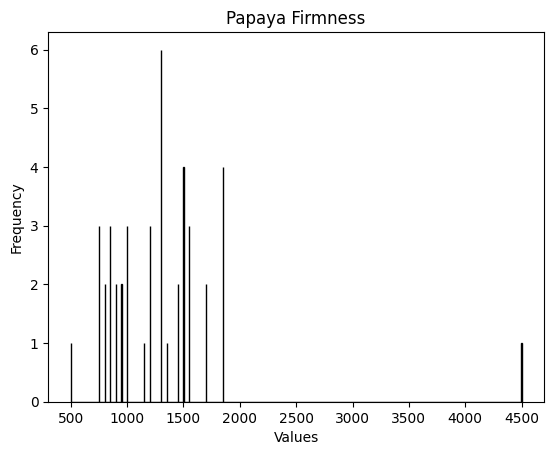

In [11]:
import matplotlib.pyplot as plt
plt.hist(firmness_list, bins=range(min(firmness_list), max(firmness_list)+1), edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Papaya Firmness')
plt.show()